<a href="https://colab.research.google.com/github/jwlee95/OpenECG/blob/master/NeuroKit2%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC_4~5%EC%B4%88_%EC%A0%95%EB%8F%84%EC%9D%98_%EC%8B%AC%EC%A0%84%EB%8F%84_%ED%8C%8C%ED%98%95%EC%9D%84_%EA%B7%B8%EB%A6%AC%EB%8A%94_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NeuroKit2를 이용하여 4~5초 정도의 심전도(ECG) 파형을 그리는 파이썬 코드.

NeuroKit2는 ECG 신호 시뮬레이션 기능을 제공하여 실제 데이터를 사용하지 않고도 쉽게 파형을 생성하고 시각화할 수 있음.

In [1]:
%pip install neurokit2

In [2]:
import neurokit2 as nk
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/neurokit2/ecg/ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


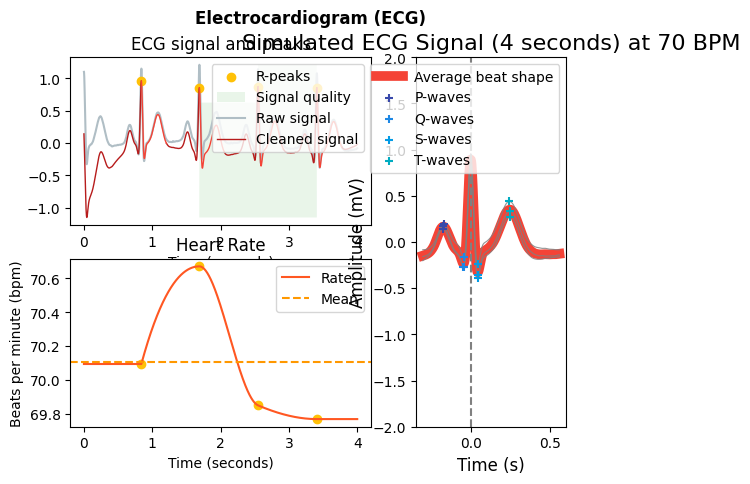

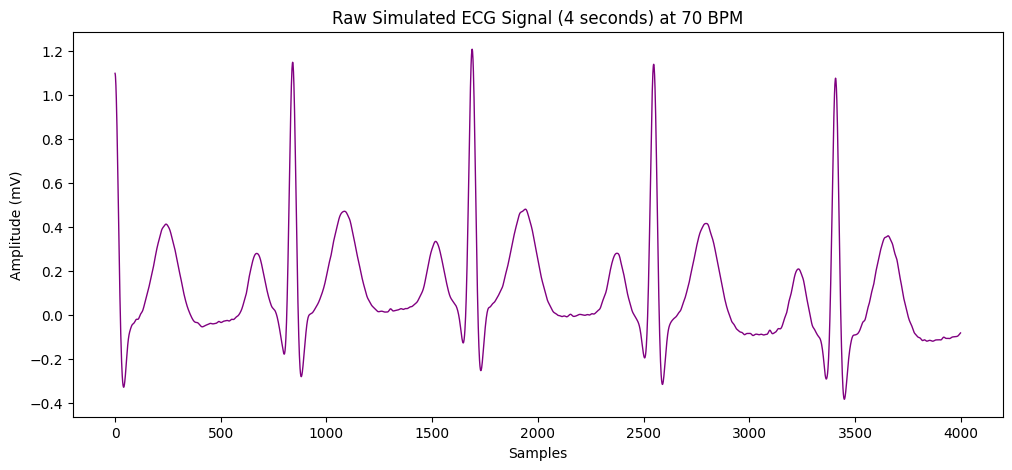

AttributeError: module 'neurokit2' has no attribute 'signal_to_epochs'

In [12]:
# 1. ECG 신호 시뮬레이션
# duration: 신호의 길이 (초 단위)
# sampling_rate: 샘플링 주파수 (Hz)
# heart_rate: 심박수 (BPM)
# noise: 노이즈의 강도 (0에 가까울수록 깨끗함)
duration_seconds = 4  # 4초에서 5초 사이로 설정
sampling_rate_hz = 1000 # 1000 Hz (1초에 1000개의 샘플)
heart_rate_bpm = 70   # 분당 70회 심박

ecg_signal = nk.ecg_simulate(
    duration=duration_seconds,
    sampling_rate=sampling_rate_hz,
    heart_rate=heart_rate_bpm,
    noise=0.01 # 약간의 노이즈 추가 (선택 사항)
)

# 2. 신호 처리 (선택 사항이지만, 더 깔끔한 파형을 위해 권장)
# NeuroKit2의 ecg_process 함수를 사용하여 필터링, R-피크 검출 등을 수행합니다.
# 이 함수는 신호의 처리된 버전과 관련 정보를 딕셔너리 형태로 반환합니다.
processed_ecg, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate_hz)

# 3. ECG 신호 플로팅
# nk.ecg_plot 함수는 처리된 ECG 신호를 매우 상세하게 시각화해줍니다.
# R-피크, P파, T파 등 다양한 생체학적 특징을 자동으로 표시해줍니다.

#fig = nk.ecg_plot(processed_ecg, sampling_rate = sampling_rate_hz)
fig = nk.ecg_plot(processed_ecg)

# 그래프 제목 및 레이블 설정 (선택 사항)
plt.title(f'Simulated ECG Signal ({duration_seconds} seconds) at {heart_rate_bpm} BPM', fontsize=16)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude (mV)', fontsize=12)

# Y축 범위 조정 (선택 사항: 파형이 너무 크거나 작게 보일 경우)
plt.ylim(-2, 2) # 예시 값. 실제 시뮬레이션 결과에 따라 조정

# 그래프 보여주기
plt.show()

# 만약 처리된 신호가 아닌 원본 시뮬레이션 신호만 간단히 보고 싶다면:
plt.figure(figsize=(12, 5))
plt.plot(ecg_signal, color='purple', linewidth=1)
plt.title(f'Raw Simulated ECG Signal ({duration_seconds} seconds) at {heart_rate_bpm} BPM')
plt.xlabel('Samples') # 샘플 단위로 표시됨
plt.ylabel('Amplitude (mV)')
#plt.grid(True)
plt.show()

# 시간 축을 샘플 대신 초로 표시하려면:
time_axis = nk.signal_to_epochs(ecg_signal, sampling_rate=sampling_rate_hz, duration=duration_seconds)['Time']
plt.figure(figsize=(12, 5))
plt.plot(time_axis, ecg_signal, color='blue', linewidth=1)
plt.title(f'Raw Simulated ECG Signal ({duration_seconds} seconds) at {heart_rate_bpm} BPM')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.show()

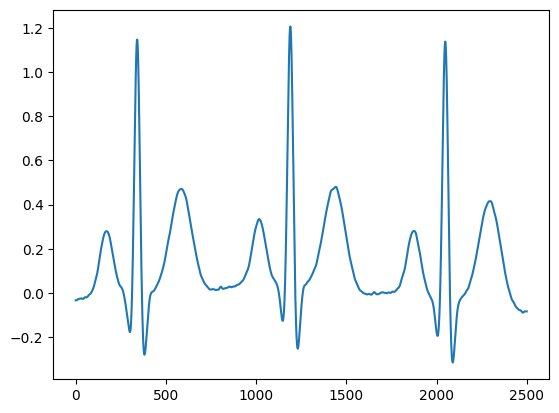

In [13]:
plt.plot(ecg_signal[500:3000])

### 코드 설명:

1.  **`import neurokit2 as nk`**: NeuroKit2 라이브러리를 `nk`라는 별칭으로 임포트합니다.
2.  **`import matplotlib.pyplot as plt`**: 그래프를 그리기 위한 Matplotlib 라이브러리를 임포트합니다.
3.  **`duration_seconds = 5`**: 신호의 길이를 5초로 설정합니다. 이 값을 4나 4.5 등으로 변경하여 4~5초 범위 내에서 조절할 수 있습니다.
4.  **`sampling_rate_hz = 1000`**: 신호의 샘플링 주파수를 1000Hz로 설정합니다. 이는 1초에 1000개의 데이터 포인트를 의미하며, 부드러운 파형을 얻는 데 적합합니다.
5.  **`heart_rate_bpm = 70`**: 심박수를 분당 70회(BPM)로 설정합니다.
6.  **`ecg_signal = nk.ecg_simulate(...)`**:
    * `nk.ecg_simulate()` 함수를 사용하여 ECG 신호를 시뮬레이션합니다.
    * `duration`, `sampling_rate`, `heart_rate` 파라미터를 사용하여 원하는 길이, 샘플링 주파수, 심박수를 지정합니다.
    * `noise` 파라미터는 시뮬레이션된 신호에 추가할 노이즈의 양을 조절합니다. 0에 가까울수록 깨끗한 신호가 됩니다.
7.  **`processed_ecg, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate_hz)`**:
    * `nk.ecg_process()` 함수는 시뮬레이션된 `ecg_signal`을 입력받아 ECG 전처리(필터링, R-피크 검출 등)를 수행합니다.
    * `processed_ecg`는 전처리된 신호와 다양한 파생 지표들을 포함하는 Pandas DataFrame입니다.
    * `info`는 R-피크 인덱스와 같은 중요한 정보를 포함하는 딕셔너리입니다.
8.  **`fig = nk.ecg_plot(processed_ecg, sampling_rate=sampling_rate_hz)`**:
    * `nk.ecg_plot()` 함수는 `processed_ecg` DataFrame을 이용하여 ECG 파형을 자동으로 그리고, R-피크, P파, T파의 위치 등을 표시해줍니다. 이는 NeuroKit2의 강력한 시각화 기능 중 하나입니다.
9.  **`plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.ylim(...)`**: Matplotlib 함수를 사용하여 그래프의 제목, 축 레이블, Y축 범위 등을 설정하여 시각적 효과를 개선합니다.
10. **`plt.show()`**: 생성된 그래프를 화면에 표시합니다.

이 코드를 실행하면 4~5초 길이의 실제 ECG와 유사한 파형이 생성되고, NeuroKit2의 플로팅 기능을 통해 R-피크 등이 자동으로 표시된 상세한 그래프를 볼 수 있습니다.